# Compartmental models in epidemiology

&gt; Compartmental models are a technique used to simplify the mathematical modelling of infectious disease. The population is divided into compartments, with the assumption that every individual in the same compartment has the same characteristics. The models are usually investigated through ordinary differential equations (which are deterministic), but can also be viewed in a stochastic framework, which is more realistic but also more complicated to analyse.
&gt;
&gt; Compartmental models may be used to predict properties of how a disease spreads, for example the prevalence (total number of infected) or the duration of an epidemic. Also, the model allows for understanding how different situations may affect the outcome of the epidemic, e.g., what the most efficient technique is for issuing a limited number of vaccines in a given population.
&gt; [Original article from wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)

$$ Suceptible \to (exposed) \to Infected \to Recovered $$

## The SIR model without a vital component (no birth or death)

$$ \left[ {\frac  {dS}{dt}}=-{\frac  {\beta IS}{N}}, {\frac  {dI}{dt}}={\frac  {\beta IS}{N}}-\gamma I, {\frac  {dR}{dt}}=\gamma I \right]$$

$${\frac  {dS}{dt}}+{\frac  {dI}{dt}}+{\frac  {dR}{dt}}=0$$

$$S(t)+I(t)+R(t)=N$$

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set_style("darkgrid")

In [8]:
def SIR(S0, I0, R0, beta, gamma, duration=100, n=1000):
    """
    Simulates a SIR evolution for a poputation of size (N), infectivity coeff (beta), and recovery coeff (gamma).
    duration (days), n (number of points)
    """
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    N = S0 + I0 + R0
    dt = duration / n
    
    Sdot = lambda t: -beta*I[t]*S[t]/N
    Idot = lambda t: beta*I[t]*S[t]/N - gamma*I[t]
    Rdot = lambda t: gamma*I[t]
    
    for t in range(1, n):
        S[t] =  (S[t-1] + dt * Sdot(t-1))
        I[t] =  (I[t-1] + dt * Idot(t-1))
        R[t] =  (R[t-1] + dt * Rdot(t-1))

    ts = np.arange(0, 100, step=dt)
    return ts, S, I, R

In [9]:
def plotSIR(SIR):
    ts, S, I, R =  SIR
    plt.plot(ts, S, label='S')
    plt.plot(ts, I, label='I')
    plt.plot(ts, R, label='R')
    plt.legend()
    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')

In [10]:
S0 = 100000
I0 = 1000
R0 = 0

beta = 2
gamma = 1
sir = SIR(S0, I0, R0, beta, gamma)

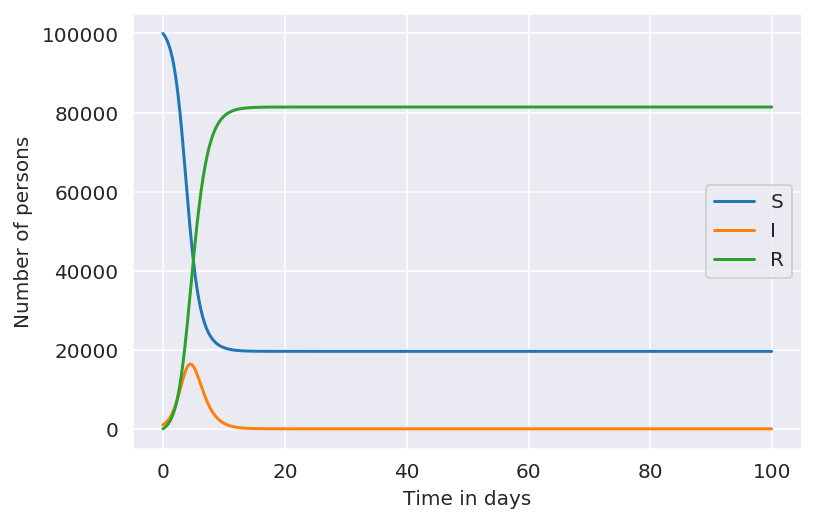

In [11]:
plotSIR(sir)

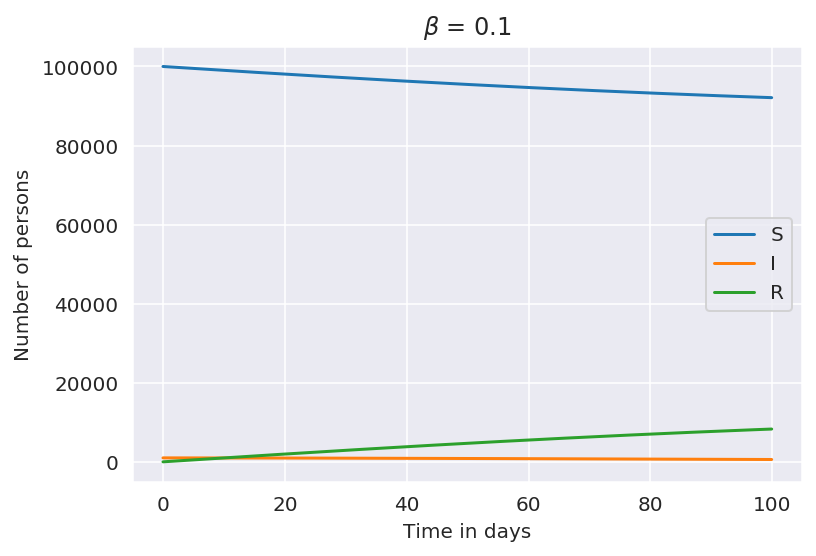

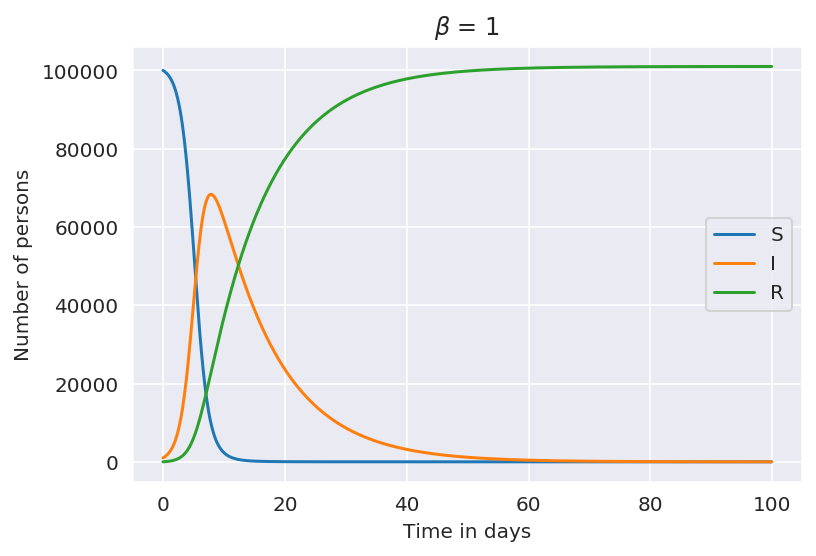

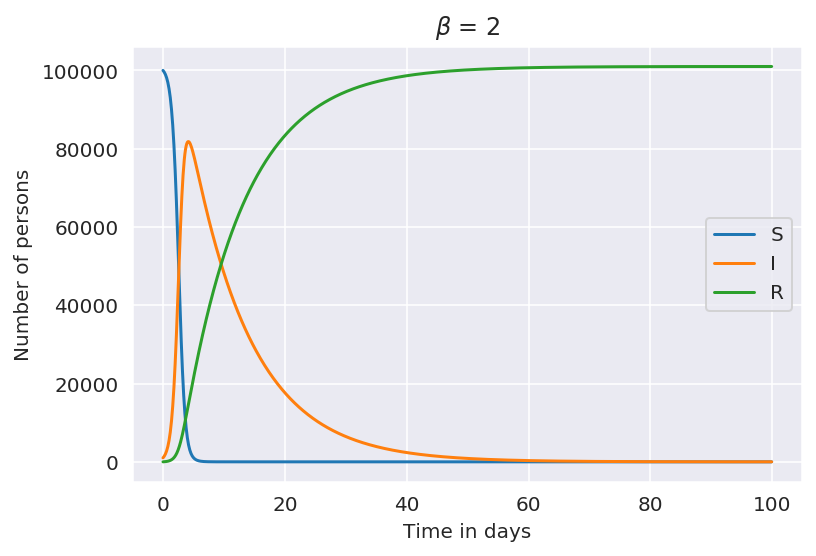

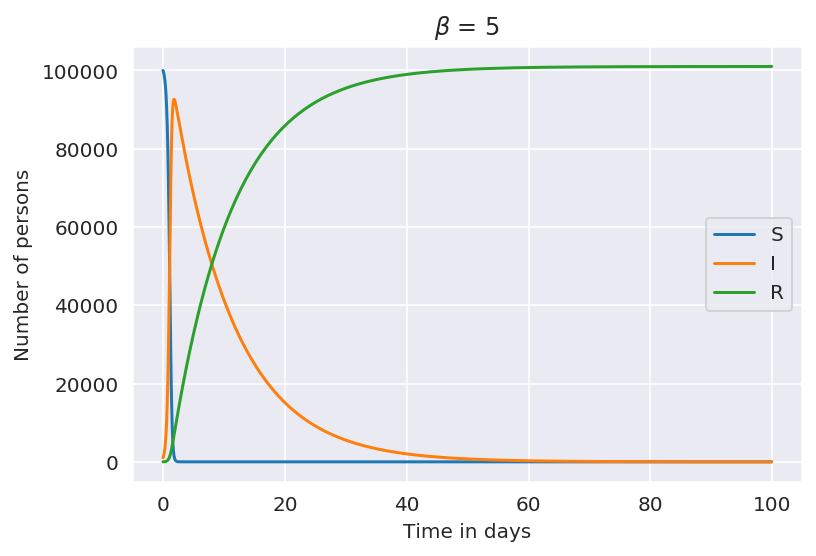

In [12]:
S0 = 100000
I0 = 1000
R0 = 0
gamma = .1

betas = [.1, 1, 2, 5]
for b in betas:
    sir = SIR(S0, I0, R0, b, gamma)
    plotSIR(sir)
    plt.title(r'$\beta$ = ' + str(b))
    plt.show()